
<font size=4 color='blue'>Copyright: 2021</font>

<font size=4 color='blue'>Author:    Fernand B. Eloundou</font>

------------------------------------------------------------------------------------------

<font size=4 color='black'>File:     SWR_and_Ku_Curves_with_SHP_Data_Sources.ipynb</font>

-------------------------------------------------------------------------------------------

Soil water retention and hydraulic conductivity curves
of the data sources used for root water uptake simulations in the control and DL scenarios.

Data sources: HYPROP optimization, ROSETTA, and Woesten PTFs (Seidel S., 2020)

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# pressure head for analytical solution

h1203  = -np.logspace(-2, 7, 99, endpoint=False)
h1202 = -np.logspace(-2, 7, 99, endpoint=False)

In [3]:
# effective saturation for analytical solution

Se1203 = np.linspace(0, 1.9, 99, endpoint=False)
Se1202 = np.linspace(0, 1.9, 99, endpoint=False)

- Definition of soil hydraulic parameters

    * theta(h): volumetric water content (cm$^3$ cm$^-$$^3$) at pressure head (cm)
    * theta_r:  volumetric residual water content (cm$^3$ cm$^-$$^3$)
    * theta_s:  volumetric saturated water content (cm$^3$ cm$^-$$^3$)
    * alpha:    inverse of air-entry suction (cm$^-$$^1$) 
    * n:        empirical measure of pore-size distribution
    * m:        empirical constant in function of n
    * _l_:        empirical pore-conductivity often assumed to be 0.5
    * Se:       dimensionless effective/relative saturation
    * k(Se):    hydraulic conductivity (cm d$^-$$^1$) at effective saturation  
    * ksat:     saturated hydraulic conductivity (cm d$^-$$^1$)

In [4]:
# topsoil - fitted parameters 


# third optimization
theta_r1203_thirdOpt      = 0.01
theta_s1203_thirdOpt      = 0.36
alpha1203_thirdOpt        = 0.01
n1203_thirdOpt            = 1.07
m1203_thirdOpt            = 1-1/n1203_thirdOpt
ksat1203_thirdOpt         = 10.58

# Rosetta PFT
theta_r1203_rosetta      = 0.06
theta_s1203_rosetta      = 0.36
alpha1203_rosetta        = 0.01
n1203_rosetta            = 1.52
m1203_rosetta            = 1-1/n1203_rosetta
ksat1203_rosetta         = 5.51

# Wösten PFT - Seidel (2020)
theta_r1203_Seidel      = 0.01
theta_s1203_Seidel      = 0.44
alpha1203_Seidel        = 0.012
n1203_Seidel            = 1.24
m1203_Seidel            = 1-1/n1203_Seidel
ksat1203_Seidel         = 9.85

# Rosetta PTF - Deep Loosening
theta_r1203_DL          = 0.07
theta_s1203_DL          = 0.47
alpha1203_DL            = 0.01
n1203_DL                = 1.68
m1203_DL                = 1-1/n1203_DL
ksat1203_DL             = 37.84

In [5]:
# subsoil - 1202 Hyprop estimates 


# third optimization
theta_r1202_thirdOpt      = 0.01
theta_s1202_thirdOpt      = 0.33
alpha1202_thirdOpt        = 0.01
n1202_thirdOpt            = 1.12
m1202_thirdOpt            = 1-1/n1202_thirdOpt
ksat1202_thirdOpt         = 0.81

# Rosetta PFT
theta_r1202_rosetta      = 0.06
theta_s1202_rosetta      = 0.35
alpha1202_rosetta        = 0.01
n1202_rosetta            = 1.44
m1202_rosetta            = 1-1/n1202_rosetta
ksat1202_rosetta         = 2.68

# Wösten PFT - Seidel (2020)
theta_r1202_Seidel      = 0.01
theta_s1202_Seidel      = 0.44
alpha1202_Seidel        = 0.015
n1202_Seidel            = 1.24
m1202_Seidel            = 1-1/n1202_Seidel
ksat1202_Seidel         = 9.16

# Rosetta PTF - Deep Loosening
theta_r1202_DL          = 0.08
theta_s1202_DL          = 0.44
alpha1202_DL            = 0.01
n1202_DL                = 1.62
m1202_DL                = 1-1/n1202_DL
ksat1202_DL             = 15.40

In [6]:
# Standard soil hydraulic parameters for different particle size from HYDRUS-1D

# SHPs - sand
theta_r_sand            = 0.05
theta_s_sand            = 0.43
alpha_sand              = 0.15
n_sand                  = 2.68
m_sand                  = 1-1/n_sand
ksat_sand               = 712.8

# SHPs - silt
theta_r_silt            = 0.03
theta_s_silt            = 0.46
alpha_silt              = 0.02
n_silt                  = 1.37
m_silt                  = 1-1/n_silt
ksat_silt               = 6

# SHPs - clay
theta_r_clay            = 0.07
theta_s_clay            = 0.38
alpha_clay              = 0.01
n_clay                  = 1.09
m_clay                  = 1-1/n_clay
ksat_clay               = 4.8

In [7]:
# Water content - MvG function

def WaterContent(theta_s, theta_r, alpha, n, h):
    theta = (theta_s - theta_r)/(1+(-alpha*h)**n)**(1-1/n)+theta_r
    return theta

In [8]:
# Water content - MvG function
# topsoil

theta1203_thirdOpt = WaterContent(theta_s1203_thirdOpt, theta_r1203_thirdOpt, alpha1203_thirdOpt, n1203_thirdOpt, h1203)
theta1203_rosetta  = WaterContent(theta_s1203_rosetta, theta_r1203_rosetta, alpha1203_rosetta, n1203_rosetta, h1203)
theta1203_Seidel   = WaterContent(theta_s1203_Seidel, theta_r1203_Seidel, alpha1203_Seidel, n1203_Seidel, h1203)
theta1203_DL       = WaterContent(theta_s1203_DL, theta_r1203_DL, alpha1203_DL, n1203_DL, h1203)

In [9]:
# Water content - MvG function
# subsoil

theta1202_thirdOpt = WaterContent(theta_s1202_thirdOpt, theta_r1202_thirdOpt, alpha1202_thirdOpt, n1202_thirdOpt, h1202)
theta1202_rosetta  = WaterContent(theta_s1202_rosetta, theta_r1202_rosetta, alpha1202_rosetta, n1202_rosetta, h1202)
theta1202_Seidel   = WaterContent(theta_s1202_Seidel, theta_r1202_Seidel, alpha1202_Seidel, n1202_Seidel, h1202)
theta1202_DL       = WaterContent(theta_s1202_DL, theta_r1202_DL, alpha1202_DL, n1202_DL, h1202)

In [10]:
# Water content - MvG function
# standard SHPs 

theta_sand         = WaterContent(theta_s_sand, theta_r_sand, alpha_sand, n_sand, h1202)
theta_silt         = WaterContent(theta_s_silt, theta_r_silt, alpha_silt, n_silt, h1202)
theta_clay         = WaterContent(theta_s_clay, theta_r_clay, alpha_clay, n_clay, h1202)

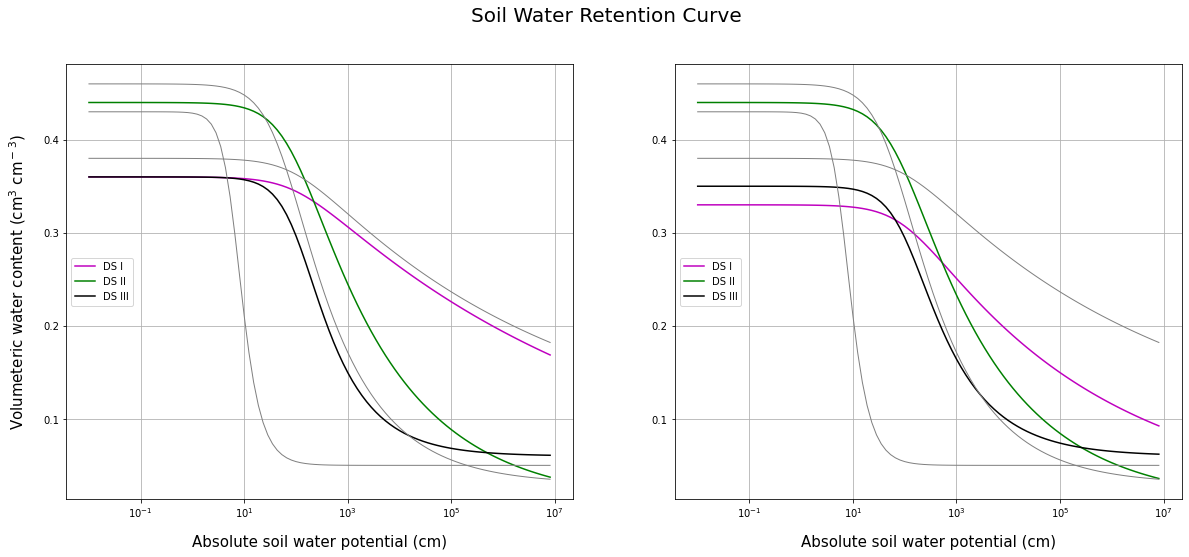

In [11]:
# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Soil Water Retention Curve', fontsize=20)

# topsoil
ax1.semilogx(abs(h1203), theta1203_thirdOpt, 'm-', label='DS I')
ax1.semilogx(abs(h1203), theta1203_Seidel, 'g-', label='DS II')
ax1.semilogx(abs(h1203), theta1203_rosetta, 'k-', label='DS III')
ax1.semilogx(abs(h1203), theta_sand, 'gray', linewidth = 1)
ax1.semilogx(abs(h1203), theta_silt, 'gray', linewidth = 1)
ax1.semilogx(abs(h1203), theta_clay, 'gray', linewidth = 1)


ax1.set_xlabel('Absolute soil water potential (cm)',fontsize=15, labelpad=15)
ax1.set_ylabel('Volumeteric water content (cm$^3$ cm$^-$$^3$)', fontsize=15, labelpad=15)
ax1.set_xscale('log')
# ax1.set_ylim(0, 0.4)
ax1.legend(loc='center left')
ax1.xaxis.grid()
ax1.yaxis.grid()

# subsoil
ax2.semilogx(abs(h1202), theta1202_thirdOpt, 'm-', label='DS I')
ax2.semilogx(abs(h1202), theta1202_Seidel, 'g-', label='DS II')
ax2.semilogx(abs(h1202), theta1202_rosetta, 'k-', label='DS III')
ax2.semilogx(abs(h1202), theta_sand, 'gray', linewidth = 1)
ax2.semilogx(abs(h1202), theta_silt, 'gray', linewidth = 1)
ax2.semilogx(abs(h1202), theta_clay, 'gray', linewidth = 1)

ax2.set_xlabel('Absolute soil water potential (cm)',fontsize=15, labelpad=15)
ax2.set_xscale('log')
# ax2.set_ylim(0, 0.4)
ax2.legend(loc='center left')
ax2.xaxis.grid()
ax2.yaxis.grid()

plt.savefig('SWR topsoil and subsoil.png')
plt.show()

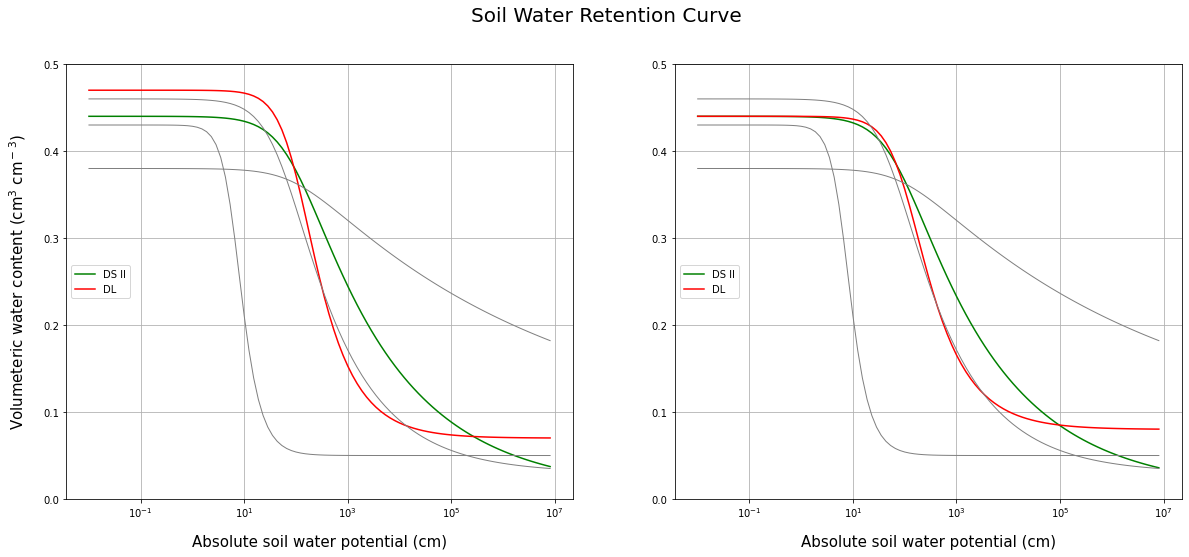

In [12]:
# plot soil water retention curve- control and DL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('Soil Water Retention Curve', fontsize=20)

# topsoil
ax1.semilogx(abs(h1203), theta1203_Seidel, 'g-', label='DS II')
ax1.semilogx(abs(h1203), theta1203_DL, 'r-', label='DL')
ax1.semilogx(abs(h1203), theta_sand, 'gray', linewidth = 1)
ax1.semilogx(abs(h1203), theta_silt, 'gray', linewidth = 1)
ax1.semilogx(abs(h1203), theta_clay, 'gray', linewidth = 1)

ax1.set_xlabel('Absolute soil water potential (cm)',fontsize=15, labelpad=15)
ax1.set_ylabel('Volumeteric water content (cm$^3$ cm$^-$$^3$)', fontsize=15, labelpad=15)
ax1.set_xscale('log')
ax1.set_ylim(0, 0.5)
ax1.legend(loc='center left')
ax1.xaxis.grid()
ax1.yaxis.grid()

# subsoil
ax2.semilogx(abs(h1202), theta1202_Seidel, 'g-', label='DS II')
ax2.semilogx(abs(h1202), theta1202_DL, 'r-', label='DL')
ax2.semilogx(abs(h1202), theta_sand, 'gray', linewidth = 1)
ax2.semilogx(abs(h1202), theta_silt, 'gray', linewidth = 1)
ax2.semilogx(abs(h1202), theta_clay, 'gray', linewidth = 1)

ax2.set_xlabel('Absolute soil water potential (cm)',fontsize=15, labelpad=15)
ax2.set_xscale('log')
ax2.set_ylim(0, 0.5)
ax2.legend(loc='center left')
ax2.xaxis.grid()
ax2.yaxis.grid()

plt.savefig('SWR Control and DL.png')
plt.show()

In [13]:
# Hydraulic conductivity function

def HydraulicConductivity(Ksat, Se, l, m):
    Ku = Ksat*Se**l*(1-(1-Se**(1/m))**m)**2
    return Ku

In [14]:
# empirical pore-conductivity parameter

l = 0.5

# topsoil
k1203_thirdOpt = HydraulicConductivity(ksat1203_thirdOpt, Se1203, l, m1203_thirdOpt)
k1203_rosetta  = HydraulicConductivity(ksat1203_rosetta, Se1203, l, m1203_rosetta)
k1203_Seidel   = HydraulicConductivity(ksat1203_Seidel, Se1203, l, m1203_Seidel)
k1203_DL       = HydraulicConductivity(ksat1203_DL, Se1203, l, m1203_DL)

<ipython-input-13-4c26e047b325>:4: RuntimeWarning: invalid value encountered in power
  Ku = Ksat*Se**l*(1-(1-Se**(1/m))**m)**2


In [15]:
# Hydraulic conductivity function
# subsoil
k1202_thirdOpt = HydraulicConductivity(ksat1202_thirdOpt, Se1202, l, m1202_thirdOpt)
k1202_rosetta  = HydraulicConductivity(ksat1202_rosetta, Se1202, l, m1202_rosetta)
k1202_Seidel   = HydraulicConductivity(ksat1202_Seidel, Se1202, l, m1202_Seidel)
k1202_DL       = HydraulicConductivity(ksat1202_DL, Se1202, l, m1202_DL)

<ipython-input-13-4c26e047b325>:4: RuntimeWarning: invalid value encountered in power
  Ku = Ksat*Se**l*(1-(1-Se**(1/m))**m)**2


In [16]:
# Hydraulic conductivity function
# standard SHPs

k_sand        = HydraulicConductivity(ksat_sand, Se1202, l, m_sand)
k_silt        = HydraulicConductivity(ksat_silt, Se1202, l, m_silt)
k_clay        = HydraulicConductivity(ksat_clay, Se1202, l, m_clay)

<ipython-input-13-4c26e047b325>:4: RuntimeWarning: invalid value encountered in power
  Ku = Ksat*Se**l*(1-(1-Se**(1/m))**m)**2


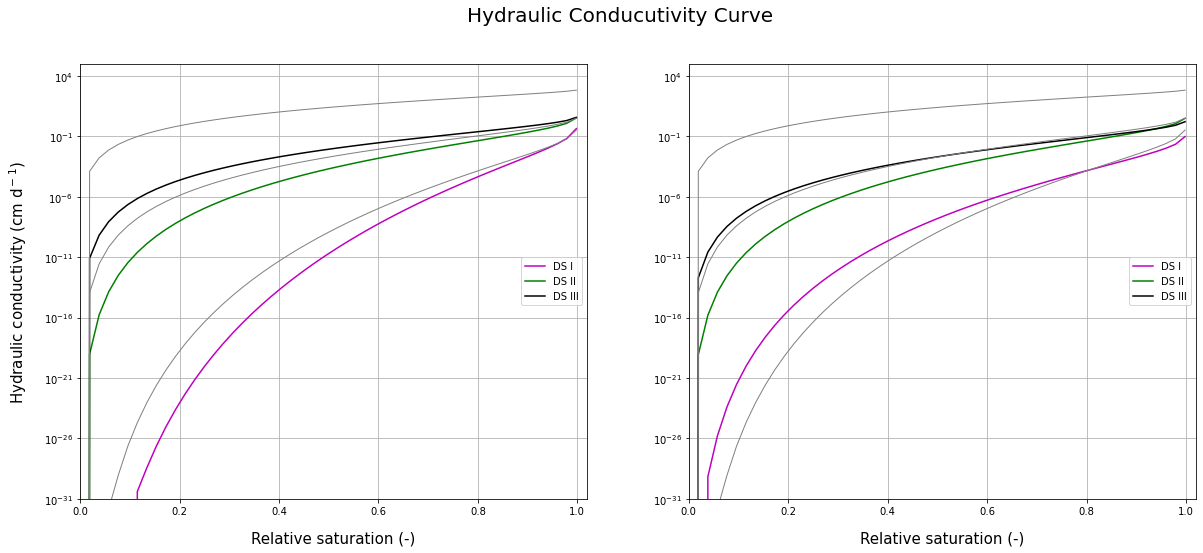

In [17]:
# plot hydraulic conductivity - topsoil and subsoil
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('Hydraulic Conducutivity Curve', fontsize=20)

# topsoil
ax1.semilogy(Se1203, k1203_thirdOpt, 'm-', label='DS I')
ax1.semilogy(Se1203, k1203_Seidel, 'g-', label='DS II')
ax1.semilogy(Se1203, k1203_rosetta, 'k-', label='DS III')
ax1.semilogy(Se1203, k_sand, 'gray', linewidth = 1)
ax1.semilogy(Se1203, k_silt, 'gray', linewidth = 1)
ax1.semilogy(Se1203, k_clay, 'gray', linewidth = 1)

ax1.set_xlabel('Relative saturation (-)',fontsize=15, labelpad=15)
ax1.set_ylabel('Hydraulic conductivity (cm d$^-$$^1$)',fontsize=15, labelpad=15)
ax1.set_xlim(0, 1.02)
ax1.set_ylim(10**-31, 10**5)
ax1.legend(loc='center right')
ax1.xaxis.grid()
ax1.yaxis.grid()

# subsoil
ax2.semilogy(Se1202, k1202_thirdOpt, 'm-', label='DS I')
ax2.semilogy(Se1202, k1202_Seidel, 'g-', label='DS II')
ax2.semilogy(Se1202, k1202_rosetta, 'k-', label='DS III')
ax2.semilogy(Se1202, k_sand, 'gray', linewidth = 1)
ax2.semilogy(Se1202, k_silt, 'gray', linewidth = 1)
ax2.semilogy(Se1202, k_clay, 'gray', linewidth = 1)

ax2.set_xlabel('Relative saturation (-)',fontsize=15, labelpad=15)
ax2.set_xlim(0, 1.02)
ax2.set_ylim(10**-31, 10**5)
ax2.legend(loc='center right')
ax2.xaxis.grid()
ax2.yaxis.grid()

plt.savefig('Hydraulic conductivity topsoil and subsoil.png')
plt.show()

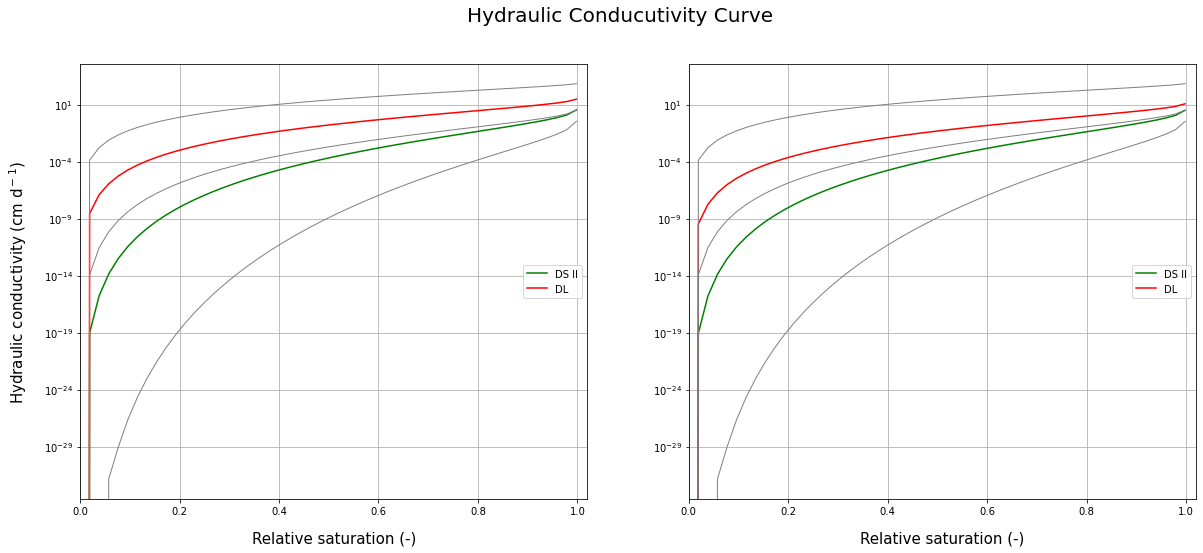

In [18]:
# plot hydraulic conductivity - control and DL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('Hydraulic Conducutivity Curve', fontsize=20)

# topsoil
ax1.semilogy(Se1203, k1203_Seidel, 'g-', label='DS II')
ax1.semilogy(Se1203, k1203_DL, 'r-', label='DL')
ax1.semilogy(Se1203, k_sand, 'gray', linewidth = 1)
ax1.semilogy(Se1203, k_silt, 'gray', linewidth = 1)
ax1.semilogy(Se1203, k_clay, 'gray', linewidth = 1)

ax1.set_xlabel('Relative saturation (-)',fontsize=15, labelpad=15)
ax1.set_ylabel('Hydraulic conductivity (cm d$^-$$^1$)',fontsize=15, labelpad=15)
ax1.set_xlim(0, 1.02)
# ax1.set_ylim(10**-31, 10**0)
ax1.legend(loc='center right')
ax1.xaxis.grid()
ax1.yaxis.grid()

# subsoil
ax2.semilogy(Se1202, k1202_Seidel, 'g-', label='DS II')
ax2.semilogy(Se1202, k1202_DL, 'r-', label='DL')
ax2.semilogy(Se1202, k_sand, 'gray', linewidth = 1)
ax2.semilogy(Se1202, k_silt, 'gray', linewidth = 1)
ax2.semilogy(Se1202, k_clay, 'gray', linewidth = 1)

ax2.set_xlabel('Relative saturation (-)',fontsize=15, labelpad=15)
ax2.set_xlim(0, 1.02)
# ax2.set_ylim(10**-31, 10**0)
ax2.legend(loc='center right')
ax2.xaxis.grid()
ax2.yaxis.grid()

plt.savefig('Hydraulic conductivity control and DL.png')
plt.show()